In [ ]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import autocorrelation_plot

sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), "src"))
from mc_lab.metropolis_hastings import MetropolisHastingsSampler

/Users/carsten/Dev/mc-lab/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
rng = np.random.default_rng(2021)

In [35]:
def target(x):
    return np.exp(-(x**2)) * (2 + np.sin(5 * x) + np.sin(2 * x))

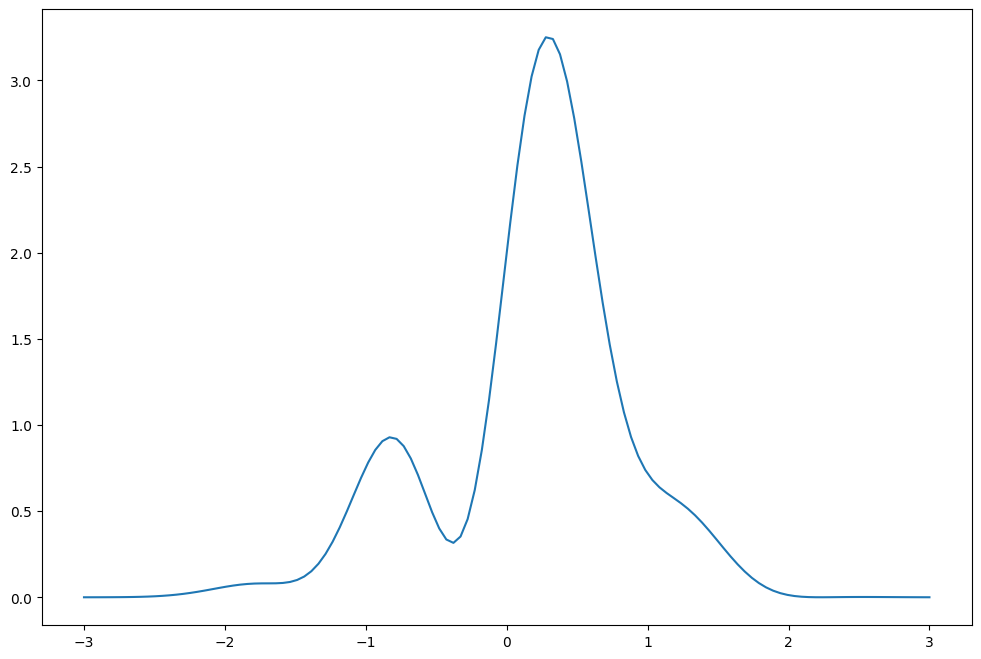

In [36]:
x = np.linspace(-3, 3, 120)
y = target(x)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, y);

In [37]:
def log_target(x):
    """Log probability of the target distribution."""
    x = np.atleast_1d(x)[0]  # Handle both scalar and array inputs
    return np.log(target(x)) if target(x) > 0 else -np.inf

In [38]:
def metropolis_sampler(initial_value, n=1000, sigma=1.0, burnin=0, lag=1):
    """Wrapper function to maintain compatibility with existing code."""
    sampler = MetropolisHastingsSampler(
        log_target=log_target,
        proposal_scale=sigma,
        adaptive_scaling=False,  # Disable adaptive scaling to match original behavior
    )

    # Sample using the class
    idata = sampler.sample(
        n_samples=n,
        n_chains=1,
        burn_in=burnin,
        thin=lag,
        initial_states=np.array([initial_value]),
        progressbar=False,
    )

    # Extract samples to match original function return format
    return idata.posterior["x"].values[0]

In [39]:
result = metropolis_sampler(initial_value=0, n=10000, lag=10)

# Different sigmas

In [40]:
sigmas = [1, 0.025, 50]
n = 10000
traces = []

In [41]:
bins = np.linspace(-3, 3, 120)
p = target(bins)
expected = n * p / sum(p)

In [42]:
for i in range(len(sigmas)):
    traces.append(metropolis_sampler(initial_value=-1, n=n, sigma=sigmas[i]))

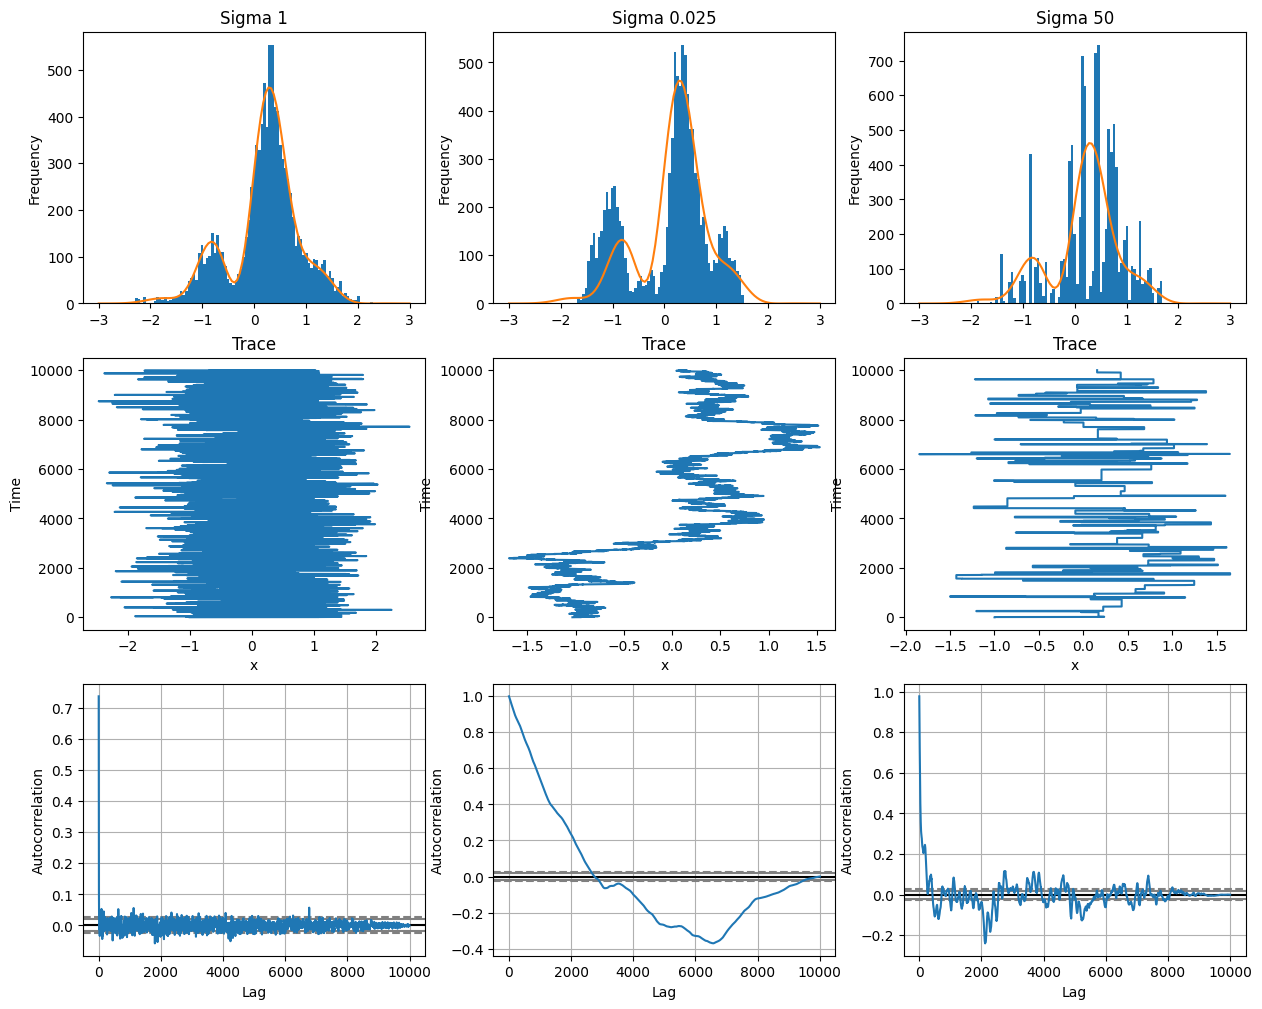

In [43]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
for j in range(3):
    axs[0, j].hist(traces[j], bins=bins)
    axs[0, j].set(title="Sigma " + str(sigmas[j]), ylabel="Frequency")
    axs[0, j].plot(bins, expected)
    axs[1, j].plot(traces[j], np.arange(0, n))
    axs[1, j].set(title="Trace", ylabel="Time", xlabel="x")
    autocorrelation_plot(traces[j], axs[2, j])

## No burn-in

In [44]:
traces = []
n = 1000
expected = n * p / sum(p)
for i in range(3):
    traces.append(metropolis_sampler(initial_value=-3, n=n, sigma=0.1))

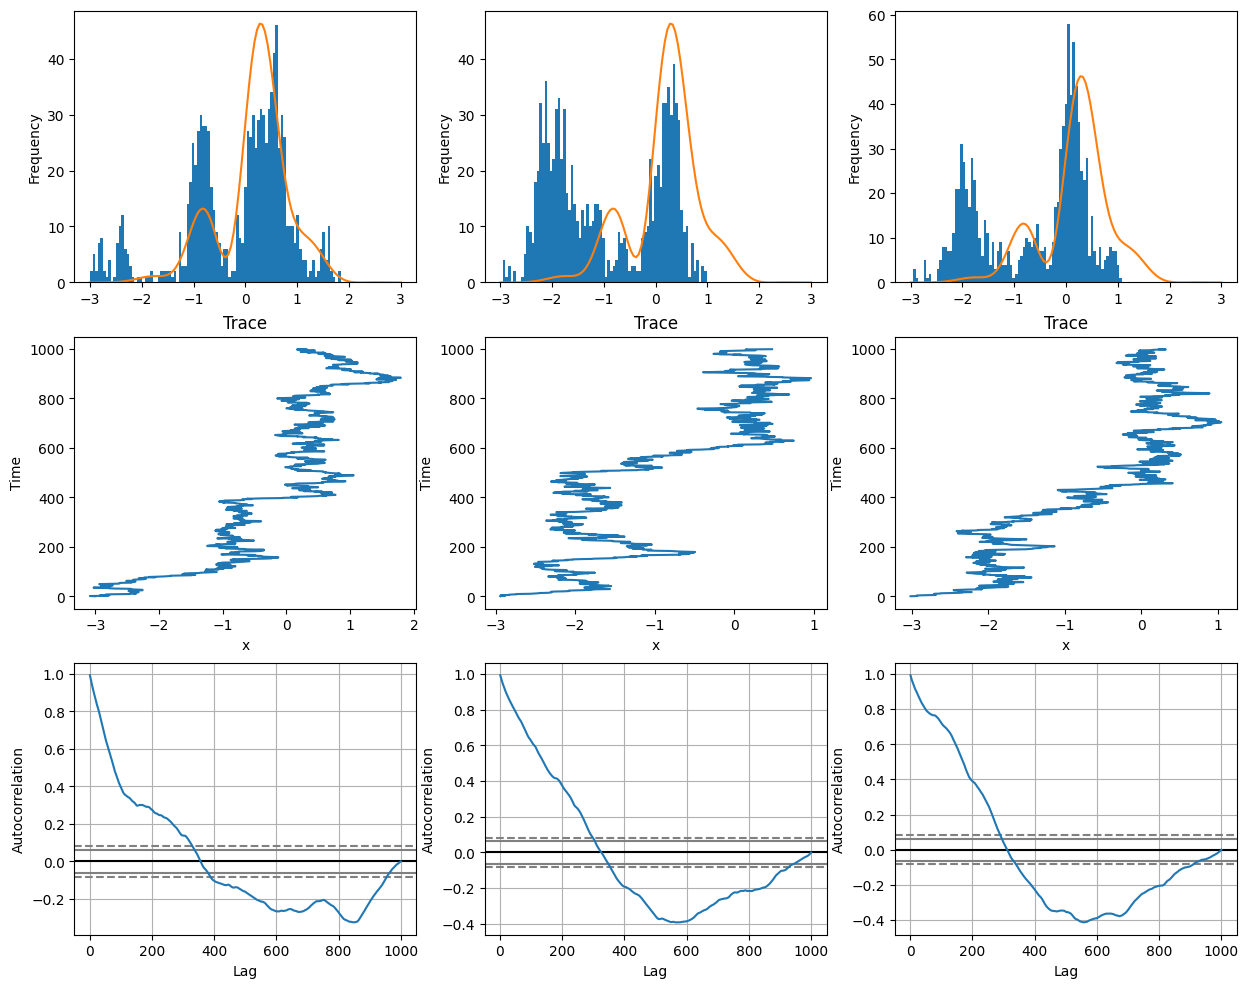

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
for j in range(3):
    axs[0, j].hist(traces[j], bins=bins)
    axs[0, j].plot(bins, expected)
    axs[0, j].set(ylabel="Frequency")
    axs[1, j].plot(traces[j], np.arange(0, n))
    axs[1, j].set(title="Trace", ylabel="Time", xlabel="x")
    autocorrelation_plot(traces[j], axs[2, j])

## Burn-in - but no thinning and pourly choosen sigma

In [46]:
traces = []
n = 1000
expected = n * p / sum(p)
for i in range(3):
    traces.append(metropolis_sampler(initial_value=-3, burnin=200, n=n, sigma=0.1))

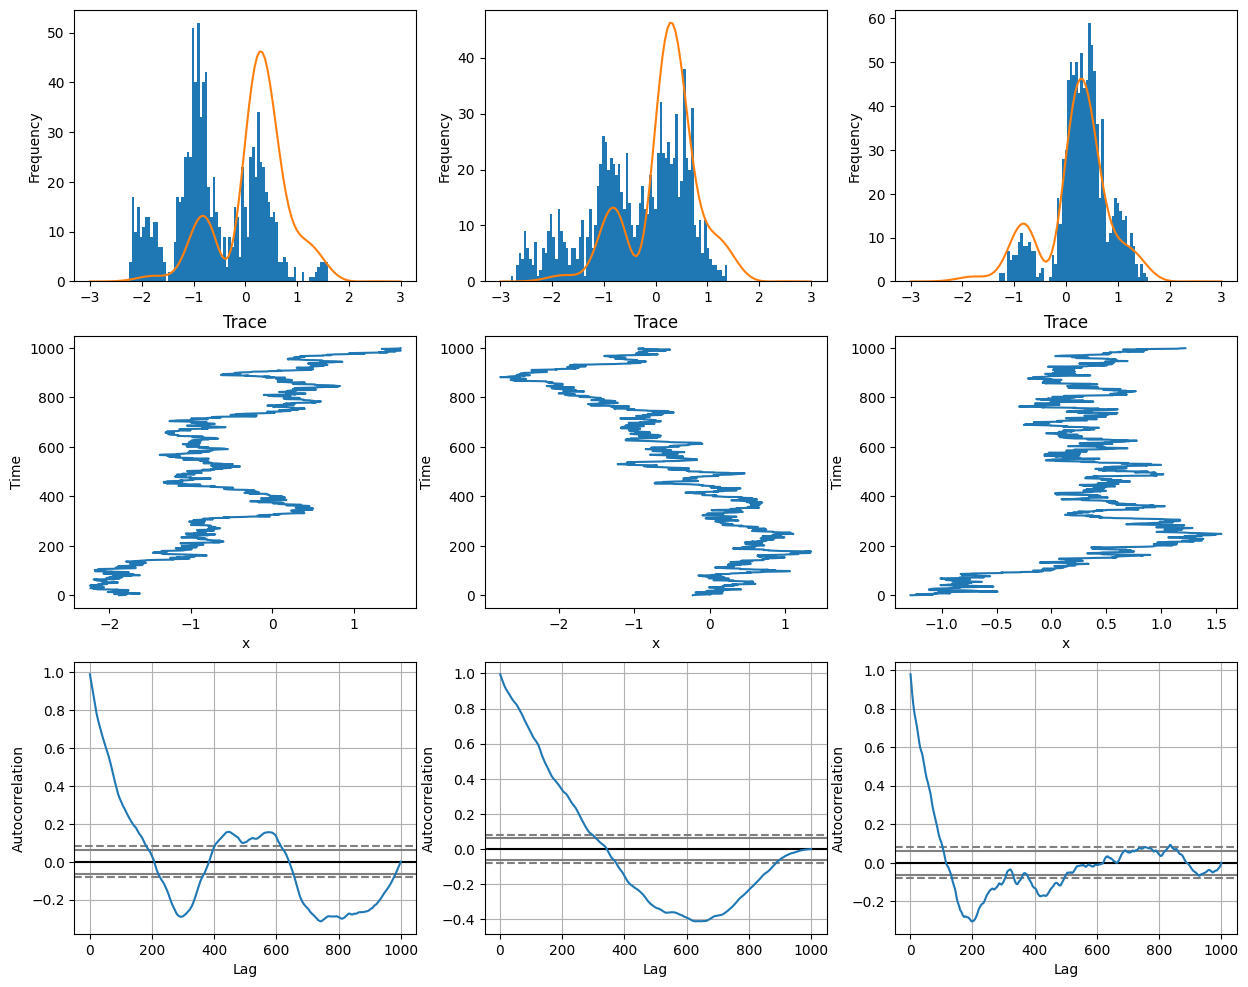

In [47]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
for j in range(3):
    axs[0, j].hist(traces[j], bins=bins)
    axs[0, j].plot(bins, expected)
    axs[0, j].set(ylabel="Frequency")
    axs[1, j].plot(traces[j], np.arange(0, n))
    axs[1, j].set(title="Trace", ylabel="Time", xlabel="x")
    autocorrelation_plot(traces[j], axs[2, j])

## Thinning / lag

In [56]:
traces = []
n = 1000
expected = n * p / sum(p)
lag = [1, 10, 100]
for i in range(3):
    traces.append(
        metropolis_sampler(initial_value=0, burnin=200, lag=lag[i], n=n, sigma=50)
    )

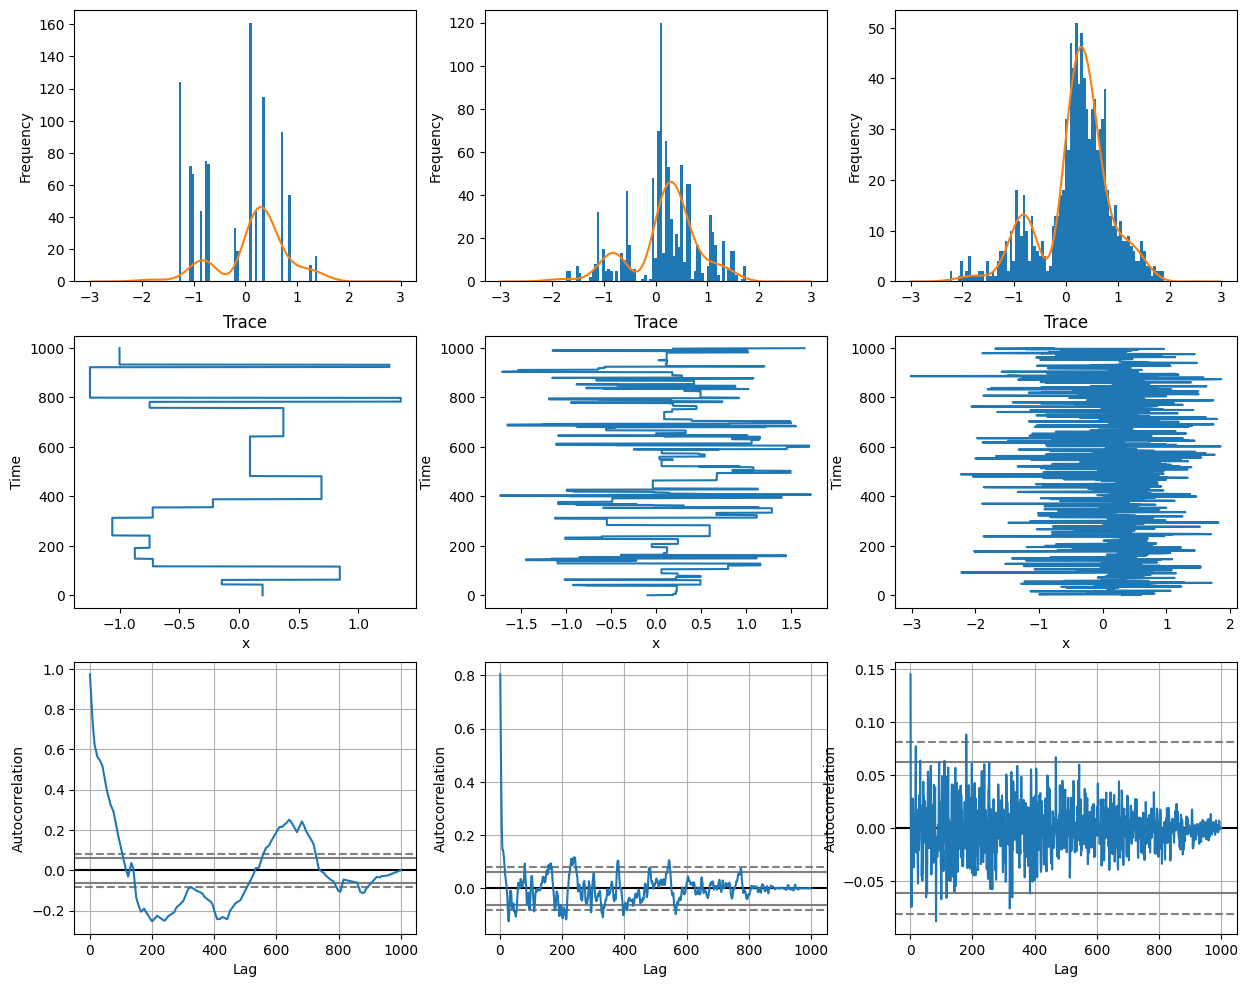

In [57]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
for j in range(3):
    axs[0, j].hist(traces[j], bins=bins)
    axs[0, j].plot(bins, expected)
    axs[0, j].set(ylabel="Frequency")
    axs[1, j].plot(traces[j], np.arange(0, n))
    axs[1, j].set(title="Trace", ylabel="Time", xlabel="x")
    autocorrelation_plot(traces[j], axs[2, j])